In [1]:
import numpy as np
import matplotlib.pyplot as plt

(a)

In [2]:
c1 = np.array([[2, 1],
               [2, 2],
               [2, 3]], dtype=float)
c2 = np.array([[4, 3],
               [5, 3],
               [6, 4]], dtype=float)
X = np.vstack((c1, c2))
X

array([[2., 1.],
       [2., 2.],
       [2., 3.],
       [4., 3.],
       [5., 3.],
       [6., 4.]])

Compute the covariance matrix:


In [3]:
cov_matrix = np.cov(X.T)
cov_matrix

array([[3.1       , 1.4       ],
       [1.4       , 1.06666667]])

Compute eigenvalues and eigenvectors:

In [4]:
eigvals, eigvecs = np.linalg.eig(cov_matrix)
eigvals, eigvecs

(array([3.81353884, 0.35312782]),
 array([[ 0.89095421, -0.45409317],
        [ 0.45409317,  0.89095421]]))

Select the eigenvector corresponding to the largest eigenvalue (principal direction):

In [5]:
max_index = np.argmax(eigvals)
principal_direction = eigvecs[:, max_index]
principal_direction = principal_direction / np.linalg.norm(principal_direction)
max_index, principal_direction

(0, array([0.89095421, 0.45409317]))

Compute the line equation through the centroid:


In [6]:
# Equation form: w^T x + w0 = 0, where w0 = -w^T * centroid
centroid = np.mean(X, axis=0)
w0 = -np.dot(principal_direction, centroid)
w0

-4.329254830199028

In [7]:
print(f"\nLinear equation: {principal_direction[0]:.4f} * x1 + {principal_direction[1]:.4f} * x2 + ({w0:.4f}) = 0")


Linear equation: 0.8910 * x1 + 0.4541 * x2 + (-4.3293) = 0


Visualization:

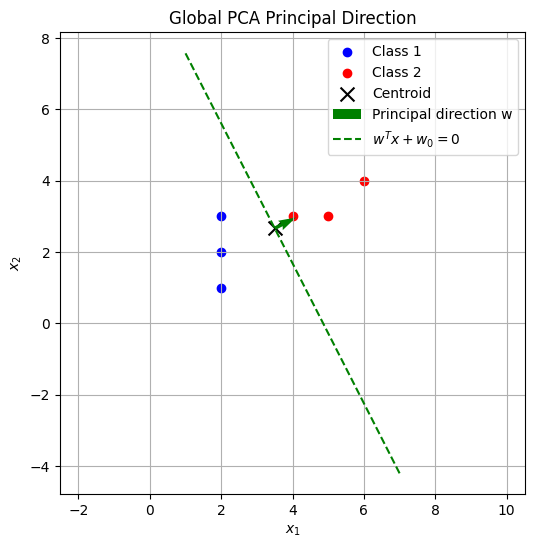

In [8]:
plt.figure(figsize=(6, 6))
# Plot data points of both classes
plt.scatter(c1[:, 0], c1[:, 1], color='blue', label='Class 1')
plt.scatter(c2[:, 0], c2[:, 1], color='red', label='Class 2')
# Plot centroid
plt.scatter(*centroid, color='black', marker='x', s=100, label='Centroid')
# Plot the principal direction vector
plt.quiver(centroid[0], centroid[1], principal_direction[0], principal_direction[1],
           angles='xy', scale_units='xy', scale=1.5, color='green', label='Principal direction w')
# Plot the line passing through the centroid
x_vals = np.linspace(1, 7, 100)
y_vals = -(principal_direction[0] * x_vals + w0) / principal_direction[1]
plt.plot(x_vals, y_vals, 'g--', label=r'$w^T x + w_0 = 0$')
# Plot settings
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.title("Global PCA Principal Direction")
plt.show()

(b)

Project centered data onto principal component to obtain scalar projections z

In [9]:
# equation: z_i = w^T (x_i - centroid)
X_centered = X - centroid  # shape (n, 2)
z = X_centered.dot(principal_direction)  # shape (n,)
z

array([-2.09325325, -1.63916009, -1.18506692,  0.59684149,  1.4877957 ,
        2.83284307])

Reconstruct back to original space:

In [10]:
# equation: x_hat_i = centroid + z_i * w
X_recon = np.outer(z, principal_direction) + centroid
X_recon

array([[1.63500721, 1.71613467],
       [2.03958343, 1.92233527],
       [2.44415965, 2.12853588],
       [4.03175844, 2.93768831],
       [4.82555783, 3.34226453],
       [6.02393344, 3.95304135]])

Visualization: original vs reconstructed, connect with lines

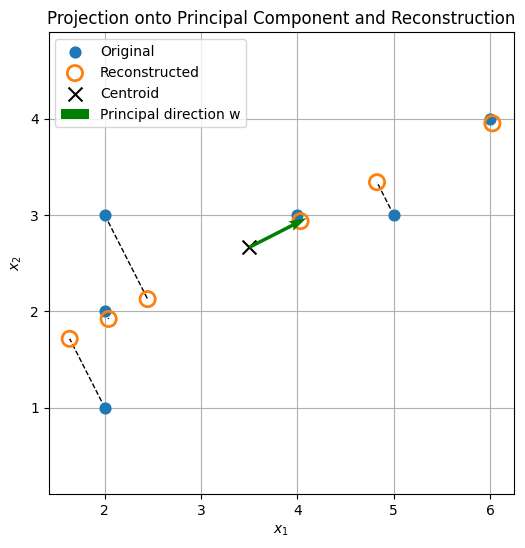

In [11]:
plt.figure(figsize=(6,6))

# original points (filled)
plt.scatter(X[:,0], X[:,1], marker='o', s=60, label='Original', zorder=3)

# reconstructed points (hollow)
plt.scatter(X_recon[:,0], X_recon[:,1], facecolors='none', edgecolors='tab:orange',
            marker='o', s=120, linewidths=2, label='Reconstructed', zorder=4)

# connect each original point to its reconstruction
for i in range(X.shape[0]):
    plt.plot([X[i,0], X_recon[i,0]], [X[i,1], X_recon[i,1]], 'k--', linewidth=1)

# plot centroid and principal direction
plt.scatter(*centroid, color='black', marker='x', s=100, label='Centroid', zorder=5)
plt.quiver(centroid[0], centroid[1], principal_direction[0], principal_direction[1],
           angles='xy', scale_units='xy', scale=1.5, color='green', label='Principal direction w', zorder=6)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.title("Projection onto Principal Component and Reconstruction")
plt.show()

(c)

Compute reconstruction errors and MSE:

In [12]:
# equation: error_i = x_i - x_hat_i
errors = X - X_recon
squared_errors = np.sum(errors**2, axis=1)
mse_total = np.mean(squared_errors)
print("\nPer-point squared reconstruction errors :")
for i, se in enumerate(squared_errors):
    print(f"Point {i+1}: {se:.6f}")
print(f"\nMean Squared Error (MSE): {mse_total:.6f}")


Per-point squared reconstruction errors :
Point 1: 0.646069
Point 2: 0.007599
Point 3: 0.956728
Point 4: 0.004891
Point 5: 0.147575
Point 6: 0.002778

Mean Squared Error (MSE): 0.294273


(d)

Split projections by class

In [13]:
z1 = z[:3]
z2 = z[3:]
z1, z2

(array([-2.09325325, -1.63916009, -1.18506692]),
 array([0.59684149, 1.4877957 , 2.83284307]))

Compute per-class mean and variance:

In [14]:
m1 = np.mean(z1)
m2 = np.mean(z2)
sigma1_sq = np.var(z1, ddof=0)
sigma2_sq = np.var(z2, ddof=0)
m1, sigma1_sq, m2, sigma2_sq

(-1.6391600857157167,
 0.13746706965069366,
 1.6391600857157167,
 0.8447394314242658)

Calculate Fisher discriminant ratio: 

FR = (m1 - m2)^2 / (sigma1^2 + sigma2^2)

In [15]:
FR = (m1 - m2)**2 / (sigma1_sq + sigma2_sq)
print(f"\nFisher's Ratio (FR): {FR:.4f}")


Fisher's Ratio (FR): 10.9421
